1. Create a recurring database of regional corn prices for PA. 

In [58]:
import pandas as pd

csv_path = '/Users/nshaffer/Desktop/Corn Prices.csv'  # or adjust if just the CSV is on desktop

df = pd.read_csv(csv_path)
print(df.head())


month_map = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

# Convert first 3 letters to uppercase before mapping
df['Month_Order'] = df['Period'].str[:3].str.upper().map(month_map)
# Sort by 'Year' and then by 'Month_Order' ascending
df_sorted = df.sort_values(by=['Year', 'Month_Order'], ascending=[False, False])

print(df_sorted.head())



  Program  Year Period  Week Ending Geo Level         State  State ANSI  \
0  SURVEY  2025    APR          NaN     STATE  PENNSYLVANIA          42   
1  SURVEY  2025    FEB          NaN     STATE  PENNSYLVANIA          42   
2  SURVEY  2025    JAN          NaN     STATE  PENNSYLVANIA          42   
3  SURVEY  2025    JUN          NaN     STATE  PENNSYLVANIA          42   
4  SURVEY  2025    MAR          NaN     STATE  PENNSYLVANIA          42   

   Ag District  Ag District Code  County  ...  Zip Code  Region  \
0          NaN               NaN     NaN  ...       NaN     NaN   
1          NaN               NaN     NaN  ...       NaN     NaN   
2          NaN               NaN     NaN  ...       NaN     NaN   
3          NaN               NaN     NaN  ...       NaN     NaN   
4          NaN               NaN     NaN  ...       NaN     NaN   

   watershed_code  Watershed  Commodity  \
0               0        NaN       CORN   
1               0        NaN       CORN   
2               0

In [59]:
import pandas as pd

# Assuming df_sorted is already sorted by ['Year', 'Month_Order']
# For example:
# df_sorted = df.sort_values(by=['Year', 'Month_Order'], ascending=[True, True])

# Create a 'Date' column with the last day of each month
df_sorted['Date'] = pd.to_datetime(dict(year=df_sorted['Year'], month=df_sorted['Month_Order'], day=1))
df_sorted['Date'] = df_sorted['Date'] + pd.offsets.MonthEnd(0)
df_sorted.set_index('Date', inplace=True)


print(df_sorted.head())


           Program  Year Period  Week Ending Geo Level         State  \
Date                                                                   
2025-06-30  SURVEY  2025    JUN          NaN     STATE  PENNSYLVANIA   
2025-05-31  SURVEY  2025    MAY          NaN     STATE  PENNSYLVANIA   
2025-04-30  SURVEY  2025    APR          NaN     STATE  PENNSYLVANIA   
2025-03-31  SURVEY  2025    MAR          NaN     STATE  PENNSYLVANIA   
2025-02-28  SURVEY  2025    FEB          NaN     STATE  PENNSYLVANIA   

            State ANSI  Ag District  Ag District Code  County  ...  Region  \
Date                                                           ...           
2025-06-30          42          NaN               NaN     NaN  ...     NaN   
2025-05-31          42          NaN               NaN     NaN  ...     NaN   
2025-04-30          42          NaN               NaN     NaN  ...     NaN   
2025-03-31          42          NaN               NaN     NaN  ...     NaN   
2025-02-28          42     

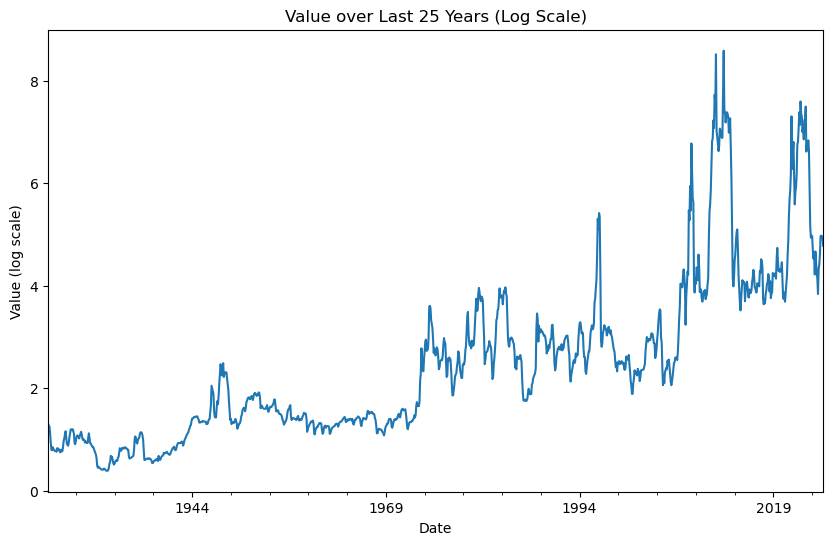

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter to last 25 years from the latest date in your DataFrame
last_date = df_sorted.index.max()
start_date = last_date - pd.DateOffset(years=100)

df_recent = df_sorted[df_sorted.index >= start_date]

# Plot filtered data
fig, ax = plt.subplots(figsize=(10,6))
df_recent['Value'].plot(ax=ax, title='Value over Last 25 Years (Log Scale)')

# Set y-axis to logarithmic scale
#ax.set_yscale('log')

ax.set_xlabel('Date')
ax.set_ylabel('Value (log scale)')

plt.show()


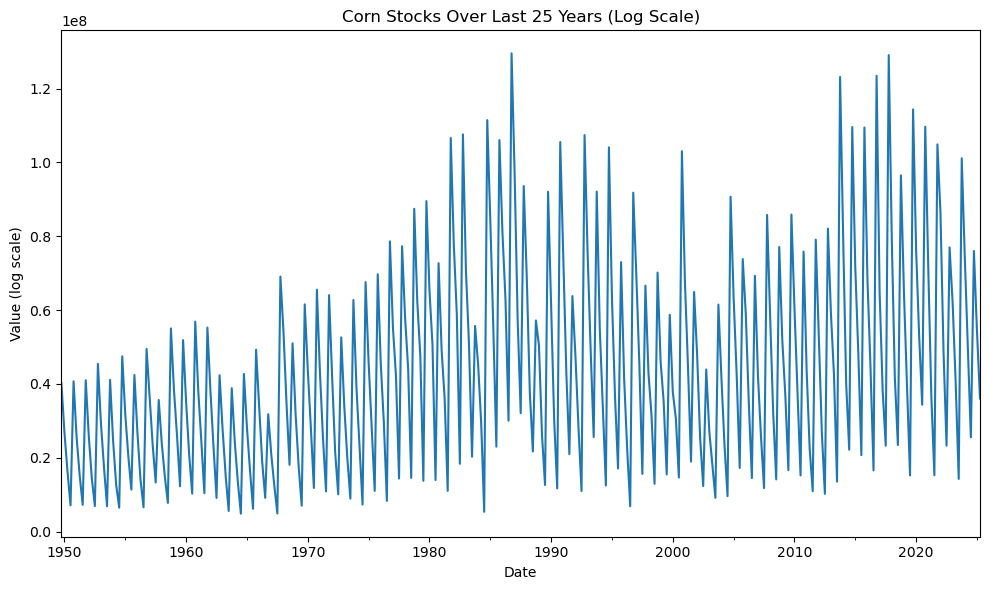

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to your corn stocks CSV file on Desktop (adjust filename if needed)
csv_path = '/Users/nshaffer/Desktop/Corn Stocks.csv'

# Verify the file exists
if not os.path.isfile(csv_path):
    raise FileNotFoundError(f"CSV file not found at {csv_path}")

# Load the CSV data into a DataFrame with a custom variable name
corn_stocks_df = pd.read_csv(csv_path)

# Map month abbreviations (first 3 letters uppercase) to month numbers
month_map = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

# Create 'Month_Order' column by extracting first 3 letters from 'Period', uppercased for mapping
corn_stocks_df['Month_Order'] = corn_stocks_df['Period'].str[-3:].str.upper().map(month_map)

# Sort dataframe by 'Year' and 'Month_Order' ascending
corn_stocks_sorted = corn_stocks_df.sort_values(by=['Year', 'Month_Order'], ascending=[False, False])

corn_stocks_sorted

# Create a datetime column with the last day of the month for each Year and Month
corn_stocks_sorted['Date'] = pd.to_datetime(
    dict(year=corn_stocks_sorted['Year'], month=corn_stocks_sorted['Month_Order'], day=1)
) + pd.offsets.MonthEnd(-1)

# Set 'Date' as index and rename index to 'MonthEndDate'
corn_stocks_sorted.set_index('Date', inplace=True)
corn_stocks_sorted.index.rename('MonthEndDate', inplace=True)




# Filter to keep only last 25 years of data
last_date = corn_stocks_sorted.index.max()
start_date = last_date - pd.DateOffset(years=100)
corn_stocks_recent = corn_stocks_sorted[corn_stocks_sorted.index >= start_date]

# Convert 'Value' column from string with commas to numeric dtype
corn_stocks_recent['Value'] = corn_stocks_recent['Value'].str.replace(',', '', regex=True)
corn_stocks_recent['Value'] = pd.to_numeric(corn_stocks_recent['Value'], errors='coerce')

# Drop rows with NaN in 'Value' after conversion
corn_stocks_recent = corn_stocks_recent.dropna(subset=['Value'])

# Plot the 'Value' column on a logarithmic scale for the last 25 years
fig, ax = plt.subplots(figsize=(10, 6))
corn_stocks_recent['Value'].plot(ax=ax, title='Corn Stocks Over Last 25 Years (Log Scale)')
#ax.set_yscale('log')
ax.set_xlabel('Date')
ax.set_ylabel('Value (log scale)')
plt.tight_layout()
plt.show()


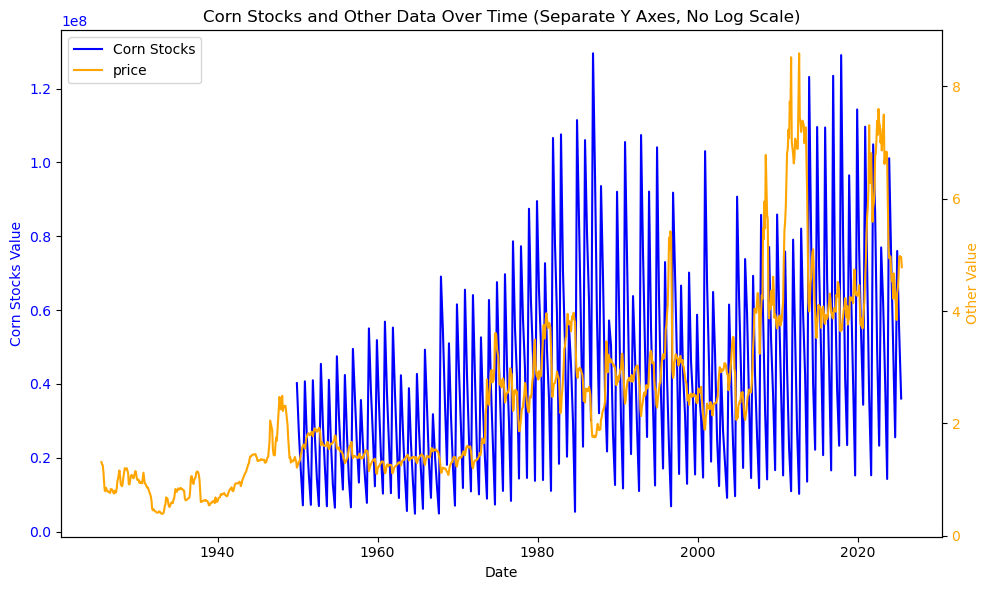

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot corn stocks on left y-axis
ax1.plot(corn_stocks_recent.index, corn_stocks_recent['Value'], color='blue', label='Corn Stocks')
ax1.set_xlabel('Date')
ax1.set_ylabel('Corn Stocks Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot df_recent data on right y-axis
ax2.plot(df_recent.index, df_recent['Value'], color='orange', label='price')
ax2.set_ylabel('Other Value', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Optional: Add a combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.title('Corn Stocks and Other Data Over Time (Separate Y Axes, No Log Scale)')
plt.tight_layout()
plt.show()

## ASK HOW TO MEASURE CORRELATION with something like this, vs supply shocks. 
